# CLUSTERING USING K-MEANS ALGORITHM

In [2]:
objective = ('The objective of this analysis is to find patterns/clusters/segments within \nthe mall customer\'s dataset')
print(objective)

The objective of this analysis is to find patterns/clusters/segments within 
the mall customer's dataset


In [3]:
# Importing relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Loading the data into the system.

data = pd.read_csv('C:\\Users\\hp\\Desktop\\Mall_Customers_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Correct the spelling error from 'Genre' to 'Gender' using pd.rename.

data.rename({'Genre':'Gender'}, axis=1, inplace=True)

In [6]:
# Note Annual Income is measured in thousand dollars.

#data.rename({'Annual Income(k$)':'Annual_Income'}, axis=1, inplace=True)

In [7]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
# EXPLORATORY DATA ANALYSIS

In [8]:
# Using graphs and charts

Text(0,0.5,'Income')

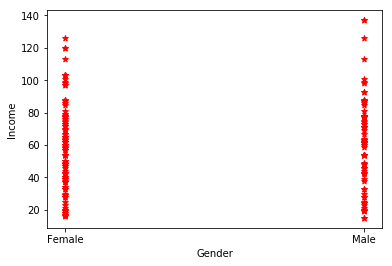

In [9]:
# Visualize the dataset on a scatterplot.

plt.scatter(data['Gender'], data['Annual Income (k$)'], color='red', marker='*')
plt.xlabel('Gender')
plt.ylabel('Income')

In [10]:
# COMMENT: The highest earner is male. A lot of the females earn approximately
            # between 18,000 and 85,000 dollars. There seem to be more females
            # than males. We would confirm via a countplot.

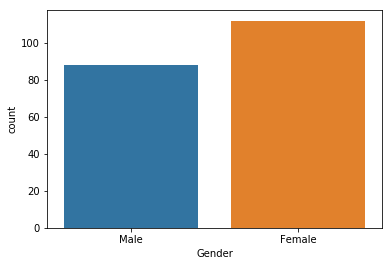

In [11]:
import seaborn as sns

sns.countplot(data['Gender'])

In [12]:
# Let's find out the exact count.

data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
# The Mall has more female than male customers. 

Text(0,0.5,'Spending Score')

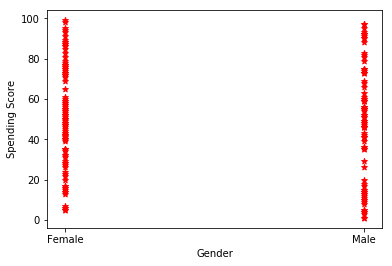

In [14]:
# Visualize the dataset on a scatterplot.
# Gender and Spending score.

plt.scatter(data['Gender'], data['Spending Score (1-100)'], color='red', marker='*')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

In [ ]:
# The ladies on average have a higher spending score, with a lot of them scoring between
    # 39 and 97 while the males have an almost evenly spread spending scores.

Text(0,0.5,'Spending Score')

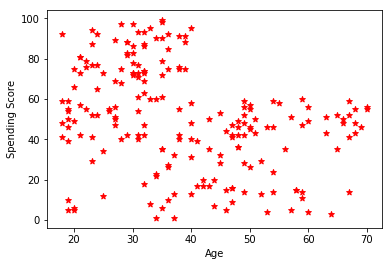

In [15]:
# Visualize the dataset on a scatterplot.
# Age and Spending Score.

plt.scatter(data['Age'], data['Spending Score (1-100)'], color='red', marker='*')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [16]:
# COMMENT: According to our dataset as displayed on the graph, young people have higher spending
            # scores than older people. It may be that the mall has more products that are more appealing
            # to younger people. Majority of the high scores are for customers that are 40years and below.
            # The spending scores of the middle aged and older people may be indirectly driven by the need
            # to satisfy the younger ones (eg parents buying an item for a child/ward)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F988DF7048>,
      dtype=object)

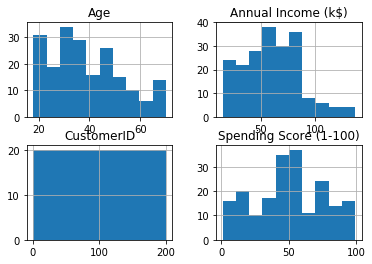

In [17]:
data.hist()

Text(0,0.5,'Spending Score')

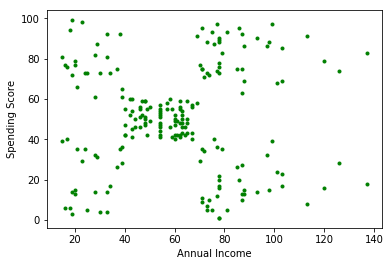

In [18]:
# Annual Income and Spending Score.

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='g', marker='.')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [19]:
# COMMENT: The graph shows different categories of spenders based on income level. There are relatively
            # low earners and low spenders, low earners but high spenders, high earners but low spenders,
            # high earners and high spenders, a few very high earners but low spenders, and a few
            # very high earners and high spenders.
    # Somewhere in between (40-65 thousand dollars) there exist some moderate spenders.
    # Note, the vertical line within than region also denotes that for a particular income,
    # different individuals have different spending score.
    
# Thus, Annual Income and Spending Score have shown clustering tendencies (clusters can be identified in their relationship)

Text(0,0.5,'Annual Income')

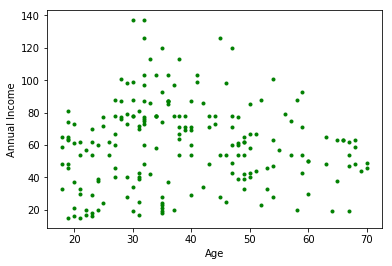

In [20]:
# Age and Annual Income.

plt.scatter(data['Age'], data['Annual Income (k$)'], color='g', marker='.')
plt.xlabel('Age')
plt.ylabel('Annual Income')

In [21]:
# COMMENT: According to our data, Young people (esp ages 28-45) on average earn more than older people.
            # this probably (other reasons may exist) explains why they spend more (and have higher spending scores)

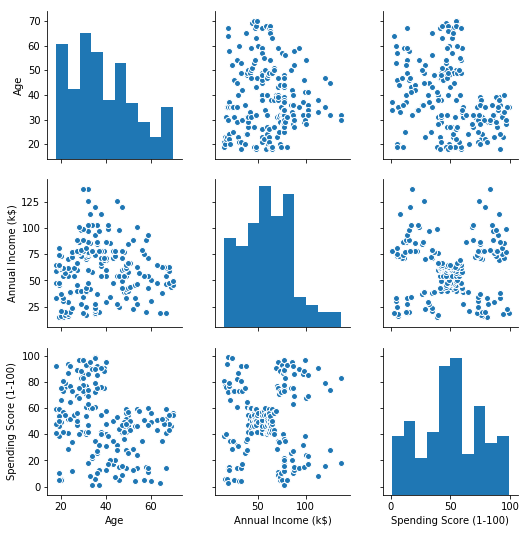

In [22]:
# An alternative to plotting the scatter plots individually is using pairplot.
# sns.pairplot(data) to pairplot the entire features or sns.pairplot(data.iloc[specify location]) for selected features.
sns.pairplot(data.iloc[:, 1:])

In [23]:
# Descriptive Statistics using measures of central tendency and dispersion.

In [24]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
# The Age column has the smallest mean (38.85) because it's observations are small
    # compared to the other features (columns). NOTE: The larger the values in a column,
    # the larger the mean.
# Age also has the smallest std cos it's observations(values) are closer to each other
    # than in the other features.
# The minimum and maximum values of each feature are quite far from that of the others, hence,
    # the need for normalization via rescaling.

In [26]:
# selecting the needed variables.

x = data.drop('CustomerID', axis=1)

In [27]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# PREPROCESSING

In [28]:
# Taking care of categorical variables (Gender in this case)

x.Gender = pd.get_dummies(x.Gender, drop_first=True)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [29]:
# Rescaling.

from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scaled_x = scx.fit_transform(x)

In [30]:
# scaled_x

In [31]:
from sklearn.cluster import KMeans

In [36]:
# Finding optimal number of clusters.
# Using Elbow method.

k_rng = range(1,11)
wcss = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_x)
    wcss.append(km.inertia_)

In [37]:
# wcss is within cluster sum of square and is measured by inertia.
wcss

[800.0,
 588.8026767824936,
 476.77320656076427,
 386.71478577406873,
 326.40326477583017,
 275.3336612307181,
 236.13996235274828,
 199.8322591743075,
 174.18800022186807,
 152.11801327614117]

Text(0.5,1,'Finding Optimal n_clusters')

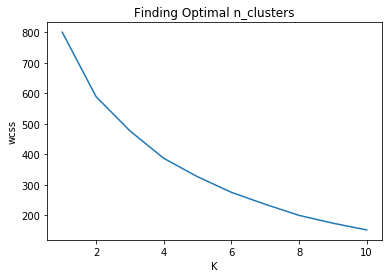

In [39]:
# Plotting the k_rng against the sse/wcss

plt.plot(k_rng,wcss)
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('Finding Optimal n_clusters')

In [40]:
# From the plot, the elbow is at 5, indicating k=5 as optimal.

In [ ]:
# BUILDING THE MODEL

In [41]:
# Making the clusters.

km = KMeans(n_clusters=5)
y_pred = km.fit_predict(x)
y_pred

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [45]:
# Finding the cluster centers aka centroids.

centroids = km.cluster_centers_
centroids

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.4025974 , 43.72727273, 55.48051948, 49.32467532],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.44      , 24.96      , 28.04      , 77.        ],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

In [ ]:
# There are 5 rows repping the 5 clusters and 4 columns repping the 4 features.

In [42]:
# Adding the predictions to the data table.

x['Cluster'] = y_pred

x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,3
2,0,20,16,6,0
3,0,23,16,77,3
4,0,31,17,40,0


In [ ]:
# Viewing the cluster result based on Annual Income and Spending Score (They showed clusters when graphed earlier).

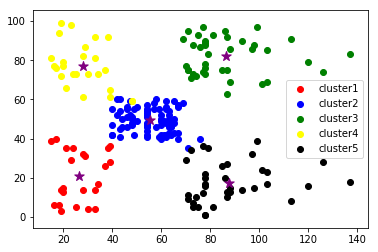

In [54]:
# Defining the clusters.
x1 = x[x.Cluster==0]
x2 = x[x.Cluster==1]
x3 = x[x.Cluster==2]
x4 = x[x.Cluster==3]
x5 = x[x.Cluster==4]

# Plotting the clusters.
plt.scatter(x1['Annual Income (k$)'], x1['Spending Score (1-100)'], color='red', label='cluster1')
plt.scatter(x2['Annual Income (k$)'], x2['Spending Score (1-100)'], color='blue', label='cluster2')
plt.scatter(x3['Annual Income (k$)'], x3['Spending Score (1-100)'], color='green', label='cluster3')
plt.scatter(x4['Annual Income (k$)'], x4['Spending Score (1-100)'], color='yellow', label='cluster4')
plt.scatter(x5['Annual Income (k$)'], x5['Spending Score (1-100)'], color='black', label='cluster5')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], color='purple', s=100, marker='*')

# [:,2] refers to the centroids of all the rows in column index 2 (that is, third column which is
# Annual Income) while [:, 3] refers to the centroids of all the rows in column index 3 (fourth column
# which is Spending score)

plt.legend(loc='best')

In [55]:
# PERMIT ME TO EXPERIMENT
# Viewing the cluster result based on Age and Spending score.

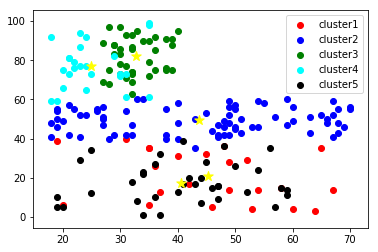

In [57]:
plt.scatter(x1['Age'], x1['Spending Score (1-100)'], color='red', label='cluster1')
plt.scatter(x2['Age'], x2['Spending Score (1-100)'], color='blue', label='cluster2')
plt.scatter(x3['Age'], x3['Spending Score (1-100)'], color='green', label='cluster3')
plt.scatter(x4['Age'], x4['Spending Score (1-100)'], color='cyan', label='cluster4')
plt.scatter(x5['Age'], x5['Spending Score (1-100)'], color='black', label='cluster5')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 3], color='yellow', s=100, marker='*')

plt.legend(loc='best')